In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss
import scipy.optimize as opt
import scipy.integrate as intgr
import time
import scipy.stats as sts

clms = np.loadtxt("clms.txt")

Part A:

CLMS Mean               : 720.277975327
CLMS Median             : 172.21
CLMS Minimum            : 0.01
CLMS Maximum            : 227967.25
CLMS Standard Deviation : 3972.66375639


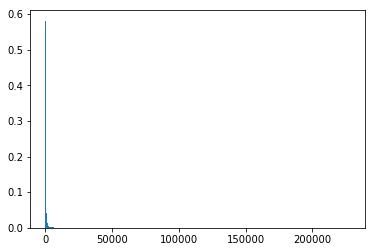

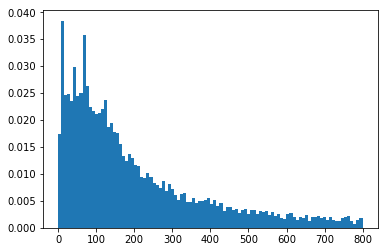

In [3]:
print("CLMS Mean               :",clms.mean())
print("CLMS Median             :",np.median(clms))
print("CLMS Minimum            :",clms.min())
print("CLMS Maximum            :",clms.max())
print("CLMS Standard Deviation :",clms.std())


weights = np.ones_like(clms)/float(len(clms))
weightz = np.ones_like(clms[clms<800])/float(len(clms))

plt.hist(clms,bins=1000,weights=weights)
plt.show()

plt.hist(clms[clms < 800],bins=100,weights=weightz)
plt.show()

Part B:

In [6]:
def gamma(x,a,B):
    r = (1/(B**a * ss.gamma(a))) * (x**(a-1)) * np.exp(-(x/B))
    return r

def MLEprob1B(params,data):
    alpha,beta = params
    pdf_vals = gamma(clms,alpha,beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return -log_lik_val

In [7]:
beta_0 = (clms.std())**2 / clms.mean()
alpha_0 =  clms.mean() / beta_0
mle_params = np.array([alpha_0,beta_0])
mle_args = (clms)

bounds = ((1e-10,None),(1e-10,None))
start1b = time.time()
results1b = opt.minimize(MLEprob1B, mle_params, args=(mle_args), bounds=bounds)
print("Total Algorithm Duration: ",time.time()-start1b,"seconds")
print("Final Log-Likelyhood    : ",-results1b.fun)
print("   ")
alphamleb, betamleb  = results1b.x
print("Alpha (MLE) :",alphamleb)
print("Beta (MLE)  :",betamleb)

Total Algorithm Duration:  0.041108131408691406 seconds
Final Log-Likelyhood    :  -82076.4516057
   
Alpha (MLE) : 0.221755309875
Beta (MLE)  : 21911.0646993


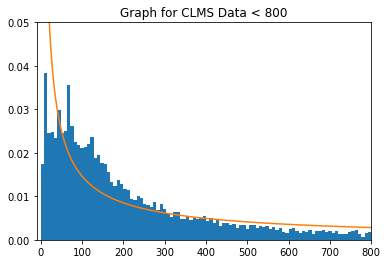

In [8]:
clms_sorted = np.array(sorted(clms))

plt.hist(clms[clms < 800],bins=100,weights=weightz)
plt.plot(clms_sorted[clms_sorted < 800],20*gamma(clms_sorted[clms_sorted < 800],alphamleb,betamleb))
plt.axis([-10,800,0,0.05])
plt.title("Graph for CLMS Data < 800")
plt.show()

Part C

In [9]:
def GG(x,a,B,m):
    r = (m/(B**a * ss.gamma(a/m))) * (x**(a-1)) * np.exp(-(x/B)**m)
    return r

def MLEprob1C(params,data):
    alpha,beta,m = params
    pdf_vals = GG(clms,alpha,beta,m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return -log_lik_val

In [10]:
beta_0 = (clms.std())**2 / clms.mean()
alpha_0 =  clms.mean() / beta_0
m_0 = 1
mle_paramsC = np.array([alpha_0,beta_0,m_0])
mle_argsC = (clms)

boundsC = ((1e-10,None),(1e-10,None),(1e-10,None))
start1c = time.time()
results1c = opt.minimize(MLEprob1C, mle_paramsC, args=(mle_argsC), bounds=boundsC)
print("Total Algorithm Duration: ",time.time()-start1c,"seconds")
print("Final Log-Likelyhood    : ",-results1c.fun)
print("   ")
alphamlec, betamlec, mmlec  = results1c.x
print("Alpha (MLE) :",alphamlec)
print("Beta (MLE)  :",betamlec)
print("m (MLE)  :",mmlec)

Total Algorithm Duration:  0.15393614768981934 seconds
Final Log-Likelyhood    :  -82076.4464629
   
Alpha (MLE) : 0.221753908911
Beta (MLE)  : 21911.0643635
m (MLE)  : 0.997682094773


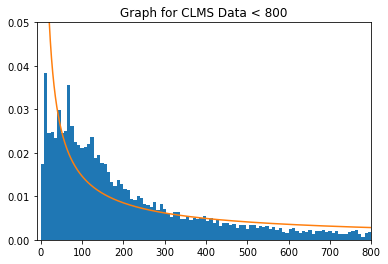

In [11]:
clms_sorted = np.array(sorted(clms))

plt.hist(clms[clms < 800],bins=100,weights=weightz)
plt.plot(clms_sorted[clms_sorted < 800],20*GG(clms_sorted[clms_sorted < 800],alphamlec,betamlec,mmlec))
plt.axis([-10,800,0,0.05])
plt.title("Graph for CLMS Data < 800")
plt.show()

Part D

In [12]:
def GB2(x,a,B,p,q):
    r = (a*x**(a*p-1)) / ((B**(a*p))*ss.beta(p,q)*((1 + (x/B)**a)**(p + q)))
    return r

def MLEprob1D(params,data):
    alpha,beta,p,q = params
    pdf_vals = GB2(clms,alpha,beta,p,q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return -log_lik_val

In [13]:
beta_0 = ((clms.std())**2) / clms.mean()
alpha_0 =  clms.mean() / beta_0
p_0 = 1
q_0 = 10
mle_paramsD = np.array([alpha_0,beta_0,p_0,q_0])
mle_argsD = (clms)

boundsD = ((1e-10,None),(1e-10,None),(1e-10,None),(1e-10,None))
start1d = time.time()
results1d = opt.minimize(MLEprob1D, mle_paramsD, args=(mle_argsD), bounds=boundsD)
print("Total Algorithm Duration: ",time.time()-start1d,"seconds")
print("Final Log-Likelyhood    : ",-results1d.fun)
print("   ")
alphamled, betamled, pmled, qmled  = results1d.x
print("Alpha (MLE) :",alphamled)
print("Beta (MLE)  :",betamled)
print("p (MLE)  :",pmled)
print("q (MLE)  :",qmled)

Total Algorithm Duration:  1.1018970012664795 seconds
Final Log-Likelyhood    :  -74863.0143388
   
Alpha (MLE) : 0.118077523098
Beta (MLE)  : 21911.0483957
p (MLE)  : 50.2753094777
q (MLE)  : 87.9196971169


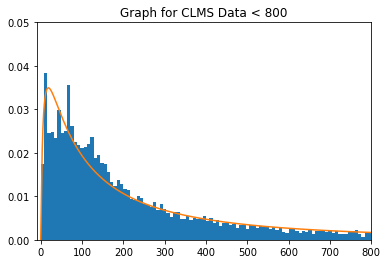

In [14]:
clms_sorted = np.array(sorted(clms))

plt.hist(clms[clms < 800],bins=100,weights=weightz)
plt.plot(clms_sorted[clms_sorted < 800],8*GB2(clms_sorted[clms_sorted < 800],alphamled,betamled,pmled,qmled))
plt.axis([-10,800,0,0.05])
plt.title("Graph for CLMS Data < 800")
plt.show()

Part E

In [20]:
GB2_params = np.array([alphamled,betamled,pmled,qmled])
BB_params  = np.array([alphamlec,betamlec,mmlec])
GG_params  = np.array([alphamleb,betamleb])

log_lik_h0 = MLEprob1D(GB2_params,clms)
log_lik_BB = MLEprob1C(BB_params,clms)
log_lik_GG = MLEprob1B(GG_params,clms)

LR_val_1 = 2 * (log_lik_BB - log_lik_h0)
pval_h0_1 = 1.0 - sts.chi2.cdf(LR_val_1, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0_1)

LR_val_2 = 2 * (log_lik_GG - log_lik_h0)
pval_h0_2 = 1.0 - sts.chi2.cdf(LR_val_2, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0_2)

chi squared of H0 with 2 degrees of freedom p-value =  0.0
chi squared of H0 with 2 degrees of freedom p-value =  0.0


Part F

In [23]:
Ffunc = lambda x: GB2(x,alphamled,betamled,pmled,qmled)
Ffnc  = lambda x: GG(x,alphamlec,betamlec,mmlec)
GB2_val,gb2err = intgr.quad(Ffunc,0,1000)
GG_val,ggerr   = intgr.quad(Ffnc,0,1000)
print("Value (GB2) :",1-GB2_val)
print("Value (GG)  :",1-GG_val)

Value (GB2) : 0.13084089245261177
Value (GG)  : 0.4519243940233123
